# Read an impulse response (IR) and plot it

Read an IR from an ARTA PIR file or try a .txt or CSV file, as exported in `transform_all_pir_to_txt`.

1. Import the following libraries
2. Read the IR from:
    1. an ARTA PIR file
    1. a .txt file
    1. a .csv file
3. See it plotted!

## Importing the libraries

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from pir import PirFile
from utils import expand_absolute_path
from pandas import read_csv

def plot_ir(ir_matrix):
    plt.figure(figsize=(16,8))
    plt.plot(ir_matrix[:, 0], ir_matrix[:, 1])
    plt.title(f"\"{file_path.split('/')[-1]}\" impulse response")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude [V]")
    plt.show()

## Reading the IR from a .txt

Read the impulse response from a .txt as exported by the Python script `transform_all_pir_to_txt`. Set the path to the txt file in the empty string in the first line of the following cell, and the sample rate in the next line.

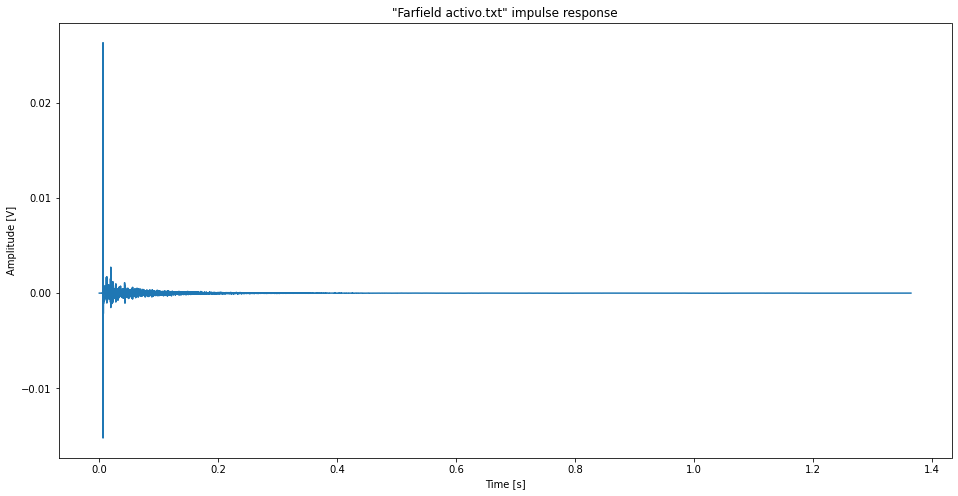

In [11]:
file_path = expand_absolute_path("")  # Set the empty string to the ABSOLUTE path to the .txt file.
sample_rate = 48000
with open(file_path, 'r') as file:
    ir = []
    while value := file.readline():
        ir.append(float(value.strip('\n')))

ir = np.array(ir)
time_vector = np.linspace(0, ir.shape[0] / sample_rate, ir.shape[0])
ir_matrix = np.array([time_vector, ir]).T

plot_ir(ir_matrix)

## Reading the IR from a CSV file

If you exported the IR into a CSV, you can read it programmatically as follows (just as an example).

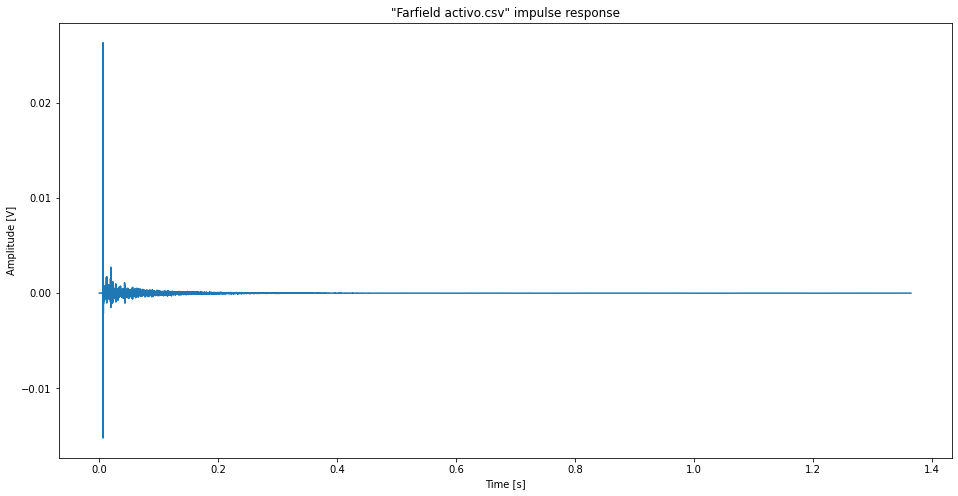

In [12]:
file_path = expand_absolute_path("")  # Set the empty string to the ABSOLUTE path to the CSV file
ir_matrix = read_csv(file_path).to_numpy()
plot_ir(ir_matrix)

## Reading the IR from a .pir file

Use the utilities in this project to read an impulse response from a .pir file. Set the path to the pir file in the empty string in the first line of the following cell.

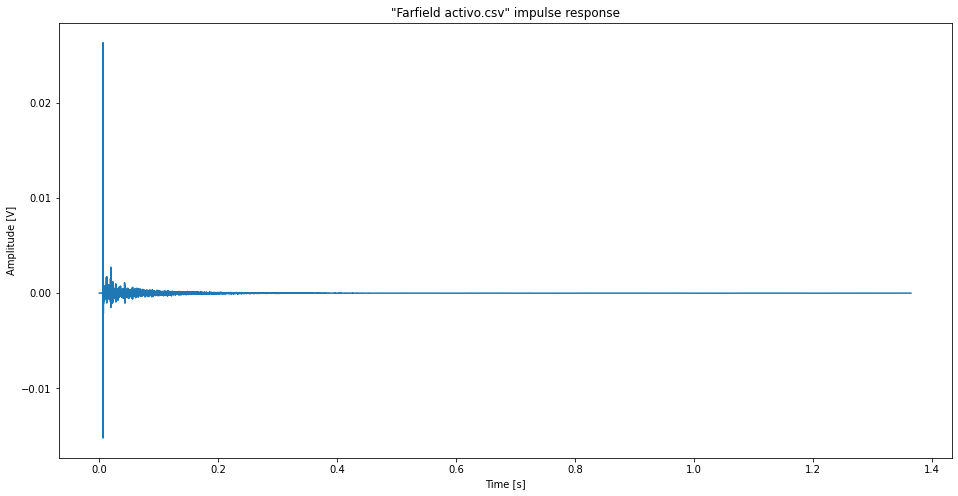

In [13]:
pir_path = expand_absolute_path("")  # Set the empty string to the path to the .pir file.
pir_file = PirFile.of(pir_path)
ir_matrix = pir_file.get_ir()
plot_ir(ir_matrix)